## <span style="color:orange">CAPSTONE PROJECT 2 :- BY RICHA SHARMA</span> 

The dataset is about the house price in California state. I am going to use python to explore, analyze and visualize the data to get business insignts of the house price for the realtors, developers and investors. I am going to generate regression model to predict the house price. 

Data Source: Real world data from redfin website :- https://www.redfin.com/

***Description of Variables:***


**DATE**: date sold \
**PRICE**: sale price \
**BEDS**: number of bedrooms \
**BATHS**: number of bathrooms \
**SQUARE FEET**: size of house in square feet \
**LOT SIZE**: size of the lot in square feet \
**BUILD YEAR**: built year of the house \
**$/SQUARE FEET**: Price of per sqft \
**HOA/MONTH**: hoa of the house per month \
**PROPERTY TYPE**: type of the house\
**CITY**: information about house located in which city\
**SALE TYPE**: info about sale type \
**ADDRESS**: address of the house \
**SOURSE**:	sourse information \
**ZIPCODE**: 5 digit zip code \
**LATITUDE, LONGITUDE**: latitude and longitude 

# Data Cleansing and Data Preparation

1. Import packages
2. Testing null value
3. Conduct some data engineering

###  <span style="color:blue">Import Libraries</span> 

Import the libraries you'll need for your analysis. You will need the following libraries:  

**Matplotlib** - This is Python's basic plotting library.
You'll use the pyplot and dates function collections from matplotlib throughout this case study so we encourage you to important these two specific libraries with their own aliases. Also, include the line **'%matplotlib inline'** so that your graphs are easily included in your notebook. 

Don't forget that to modify the matplotlib plot sizes so they're at a comfortable reading size you should use the following:

**import matplotlib as mpl**

**mpl.rcParams['figure.figsize'] = (20,5)**

**Seaborn** - This library will enable you to create aesthetically pleasing plots.

**Pandas** - This library will enable you to view and manipulate your data in a tabular format.

**statsmodels.api** - This library will enable you to create statistical models. You will need this library when performing regession analysis in Part 2 of this case study.

In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt 
import matplotlib.dates as md
%matplotlib inline
import seaborn as sns
import pandas as pd
import statsmodels.api as sm

**Load real estate data from CSV**

In [3]:
df_Redfin = pd.read_csv(r'C:\Users\16508\Downloads\redfin_2021-01-13-12-39-56.csv') 
df_Redfin.shape #Display the dimensions of the dataset.
#df_Redfin.dtypes

(5113, 27)

In [4]:
df_Redfin.describe()

,SOLD DATE,PRICE,BEDS,BATHS,SQUARE FEET,LOT SIZE,YEAR BUILT,DAYS ON MARKET,$/SQUARE FEET,HOA/MONTH,NEXT OPEN HOUSE START TIME,NEXT OPEN HOUSE END TIME,LATITUDE,LONGITUDE
count,0.0,5.112000e+03,4449.000000,4391.000000,4496.000000,3.102000e+03,4145.000000,4791.000000,4489.000000,1.901000e+03,0.0,0.0,5112.000000,5112.000000
mean,NaN,1.692538e+06,3.097325,2.473810,2091.247109,1.228820e+06,1970.944753,88.139219,772.347293,1.362527e+03,NaN,NaN,37.689298,-122.179768
std,NaN,3.346570e+06,2.008573,1.850406,2383.839078,3.955168e+07,36.087505,170.037363,726.006524,3.095725e+04,NaN,NaN,0.223479,0.230666
min,NaN,1.500000e+04,0.000000,0.500000,3.000000,1.000000e+00,1864.000000,1.000000,24.000000,0.000000e+00,NaN,NaN,37.274427,-122.854787
25%,NaN,5.990000e+05,2.000000,2.000000,1109.750000,3.192250e+03,1948.000000,8.000000,469.000000,3.440000e+02,NaN,NaN,37.489074,-122.395125
50%,NaN,9.850000e+05,3.000000,2.000000,1581.000000,6.102000e+03,1974.000000,51.000000,671.000000,4.850000e+02,NaN,NaN,37.754498,-122.202806
75%,NaN,1.682660e+06,4.000000,3.000000,2368.500000,1.336650e+04,2003.000000,105.000000,941.000000,6.790000e+02,NaN,NaN,37.845171,-121.995271
max,NaN,9.500000e+07,37.000000,63.000000,96530.000000,2.134440e+09,2021.000000,5867.000000,27200.000000,1.350000e+06,NaN,NaN,38.138003,-121.656868


In [5]:
print(df_Redfin.isnull().sum()) #.SUM() gives use count of true{which is null values} for each variables.

df_Redfin.isnull().values.any()

SALE TYPE                                                                                        0
SOLD DATE                                                                                     5113
PROPERTY TYPE                                                                                    1
ADDRESS                                                                                         59
CITY                                                                                             2
STATE OR PROVINCE                                                                                1
ZIP OR POSTAL CODE                                                                               1
PRICE                                                                                            1
BEDS                                                                                           664
BATHS                                                                                          722
LOCATION  

True

**Drop the null values**

In [6]:
df_Redfin.dropna(how = 'any').shape #all the null values have been removed

(0, 27)

In [7]:
df_Redfin.dropna(how = 'all').shape ##it shows 5113 it means there is no any rows which entire value is null.

(5113, 27)

**Columns of the dataset**

In [8]:
df_Redfin.columns

Index(['SALE TYPE', 'SOLD DATE', 'PROPERTY TYPE', 'ADDRESS', 'CITY',
       'STATE OR PROVINCE', 'ZIP OR POSTAL CODE', 'PRICE', 'BEDS', 'BATHS',
       'LOCATION', 'SQUARE FEET', 'LOT SIZE', 'YEAR BUILT', 'DAYS ON MARKET',
       '$/SQUARE FEET', 'HOA/MONTH', 'STATUS', 'NEXT OPEN HOUSE START TIME',
       'NEXT OPEN HOUSE END TIME',
       'URL (SEE http://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING)',
       'SOURCE', 'MLS#', 'FAVORITE', 'INTERESTED', 'LATITUDE', 'LONGITUDE'],
      dtype='object')

In [9]:
df_Redfin.fillna(0)

,SALE TYPE,SOLD DATE,PROPERTY TYPE,ADDRESS,CITY,STATE OR PROVINCE,ZIP OR POSTAL CODE,PRICE,BEDS,BATHS,...,STATUS,NEXT OPEN HOUSE START TIME,NEXT OPEN HOUSE END TIME,URL (SEE http://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING),SOURCE,MLS#,FAVORITE,INTERESTED,LATITUDE,LONGITUDE
0,MLS Listing,0.0,Single Family Residential,1009 Ocean View Ave,DALY CITY,CA,94014,1298000.0,3.0,2.5,...,Active,0.0,0.0,http://www.redfin.com/CA/Daly-City/1009-Ocean-...,MLSListings,ML81825573,N,Y,37.702679,-122.459277
1,MLS Listing,0.0,Single Family Residential,2242 Foxhill Dr,Martinez,CA,94553,789000.0,3.0,2.5,...,Active,0.0,0.0,http://www.redfin.com/CA/Martinez/2242-Foxhill...,"bridgeMLS, Bay East AOR, or Contra Costa AOR",40933834,N,Y,37.993345,-122.080882
2,MLS Listing,0.0,Condo/Co-op,349 Channel Way #133,Oakland,CA,94601,725000.0,2.0,2.0,...,Active,0.0,0.0,http://www.redfin.com/CA/Oakland/349-Channel-W...,"bridgeMLS, Bay East AOR, or Contra Costa AOR",40933759,N,Y,37.772045,-122.234314
3,MLS Listing,0.0,Single Family Residential,2600 Fruitvale Ave,Oakland,CA,94601,599000.0,3.0,2.0,...,Active,0.0,0.0,http://www.redfin.com/CA/Oakland/2600-Fruitval...,"bridgeMLS, Bay East AOR, or Contra Costa AOR",40933599,N,Y,37.789260,-122.220328
4,MLS Listing,0.0,Condo/Co-op,1688 Pine St Unit E506,San Francisco,CA,94109,1298000.0,2.0,2.0,...,Active,0.0,0.0,http://www.redfin.com/CA/San-Francisco/1688-Pi...,San Francisco MLS,511544,N,Y,37.789553,-122.423279
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5108,New Construction Plan,0.0,Townhouse,Residence B,Burlingame,CA,94010,1624880.0,3.0,2.5,...,Active,0.0,0.0,http://www.redfin.com/CA/Burlingame/The-Reside...,NewHomeSource.com,Plan-131803898,N,Y,37.586352,-122.357379
5109,New Construction Plan,0.0,Single Family Residential,Plan 3,Dublin,CA,94568,1158880.0,5.0,4.0,...,Active,0.0,0.0,http://www.redfin.com/CA/Dublin/Boulevard-Newb...,NewHomeSource.com,Plan-131565618,N,Y,37.707600,-121.897000
5110,New Construction Plan,0.0,Single Family Residential,Flats 3.1,Fremont,CA,94538,878000.0,3.0,2.0,...,Active,0.0,0.0,http://www.redfin.com/CA/Fremont/Local-State-S...,NewHomeSource.com,Plan-131803198,N,Y,37.549169,-121.985826
5111,New Construction Plan,0.0,Multi-Family (2-4 Unit),Plan 4 WLH,Hayward,CA,94544,844000.0,3.0,3.5,...,Active,0.0,0.0,http://www.redfin.com/CA/Hayward/SoHay-Prime/P...,NewHomeSource.com,Plan-131799278,N,Y,37.628587,-122.051426


**Display the first 5 rows to see example observations.**

In [10]:
#pd.set_option('display.max_columns', 20) ## display max 20 columns
df_Redfin.head()

,SALE TYPE,SOLD DATE,PROPERTY TYPE,ADDRESS,CITY,STATE OR PROVINCE,ZIP OR POSTAL CODE,PRICE,BEDS,BATHS,...,STATUS,NEXT OPEN HOUSE START TIME,NEXT OPEN HOUSE END TIME,URL (SEE http://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING),SOURCE,MLS#,FAVORITE,INTERESTED,LATITUDE,LONGITUDE
0,MLS Listing,NaN,Single Family Residential,1009 Ocean View Ave,DALY CITY,CA,94014,1298000.0,3.0,2.5,...,Active,NaN,NaN,http://www.redfin.com/CA/Daly-City/1009-Ocean-...,MLSListings,ML81825573,N,Y,37.702679,-122.459277
1,MLS Listing,NaN,Single Family Residential,2242 Foxhill Dr,Martinez,CA,94553,789000.0,3.0,2.5,...,Active,NaN,NaN,http://www.redfin.com/CA/Martinez/2242-Foxhill...,"bridgeMLS, Bay East AOR, or Contra Costa AOR",40933834,N,Y,37.993345,-122.080882
2,MLS Listing,NaN,Condo/Co-op,349 Channel Way #133,Oakland,CA,94601,725000.0,2.0,2.0,...,Active,NaN,NaN,http://www.redfin.com/CA/Oakland/349-Channel-W...,"bridgeMLS, Bay East AOR, or Contra Costa AOR",40933759,N,Y,37.772045,-122.234314
3,MLS Listing,NaN,Single Family Residential,2600 Fruitvale Ave,Oakland,CA,94601,599000.0,3.0,2.0,...,Active,NaN,NaN,http://www.redfin.com/CA/Oakland/2600-Fruitval...,"bridgeMLS, Bay East AOR, or Contra Costa AOR",40933599,N,Y,37.789260,-122.220328
4,MLS Listing,NaN,Condo/Co-op,1688 Pine St Unit E506,San Francisco,CA,94109,1298000.0,2.0,2.0,...,Active,NaN,NaN,http://www.redfin.com/CA/San-Francisco/1688-Pi...,San Francisco MLS,511544,N,Y,37.789553,-122.423279


**Some feaures are numeric and some are categorical
Filtering the categorical features:**

In [11]:
df_Redfin.dtypes[df_Redfin.dtypes=='object']

SALE TYPE                                                                                     object
PROPERTY TYPE                                                                                 object
ADDRESS                                                                                       object
CITY                                                                                          object
STATE OR PROVINCE                                                                             object
ZIP OR POSTAL CODE                                                                            object
LOCATION                                                                                      object
STATUS                                                                                        object
URL (SEE http://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING)    object
SOURCE                                                                                     

**Distributions of numeric features
One of the most enlightening data exploration tasks is plotting the distributions of your features.**

## Part 1: <span style="color:green">DESCRIPTIVE STATISTICS</span> ##

## Step 1: Create a scatterplot of Longitude, Latitude and Price.

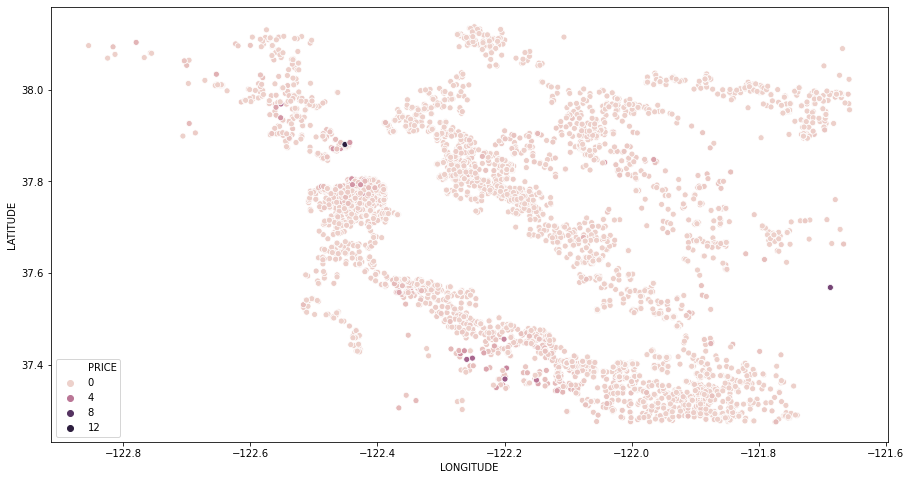

In [12]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='LONGITUDE',y='LATITUDE',data=df_Redfin,hue='PRICE')



**Insights:-** *Van Ness near to San Fransico has highest property price if we use this map distribution comparing to google map.*

## Step 2: Create a barchart of Price and City.

(array([       0.,  5000000., 10000000., 15000000., 20000000., 25000000.,
        30000000., 35000000., 40000000.]),
 <a list of 9 Text major ticklabel objects>)

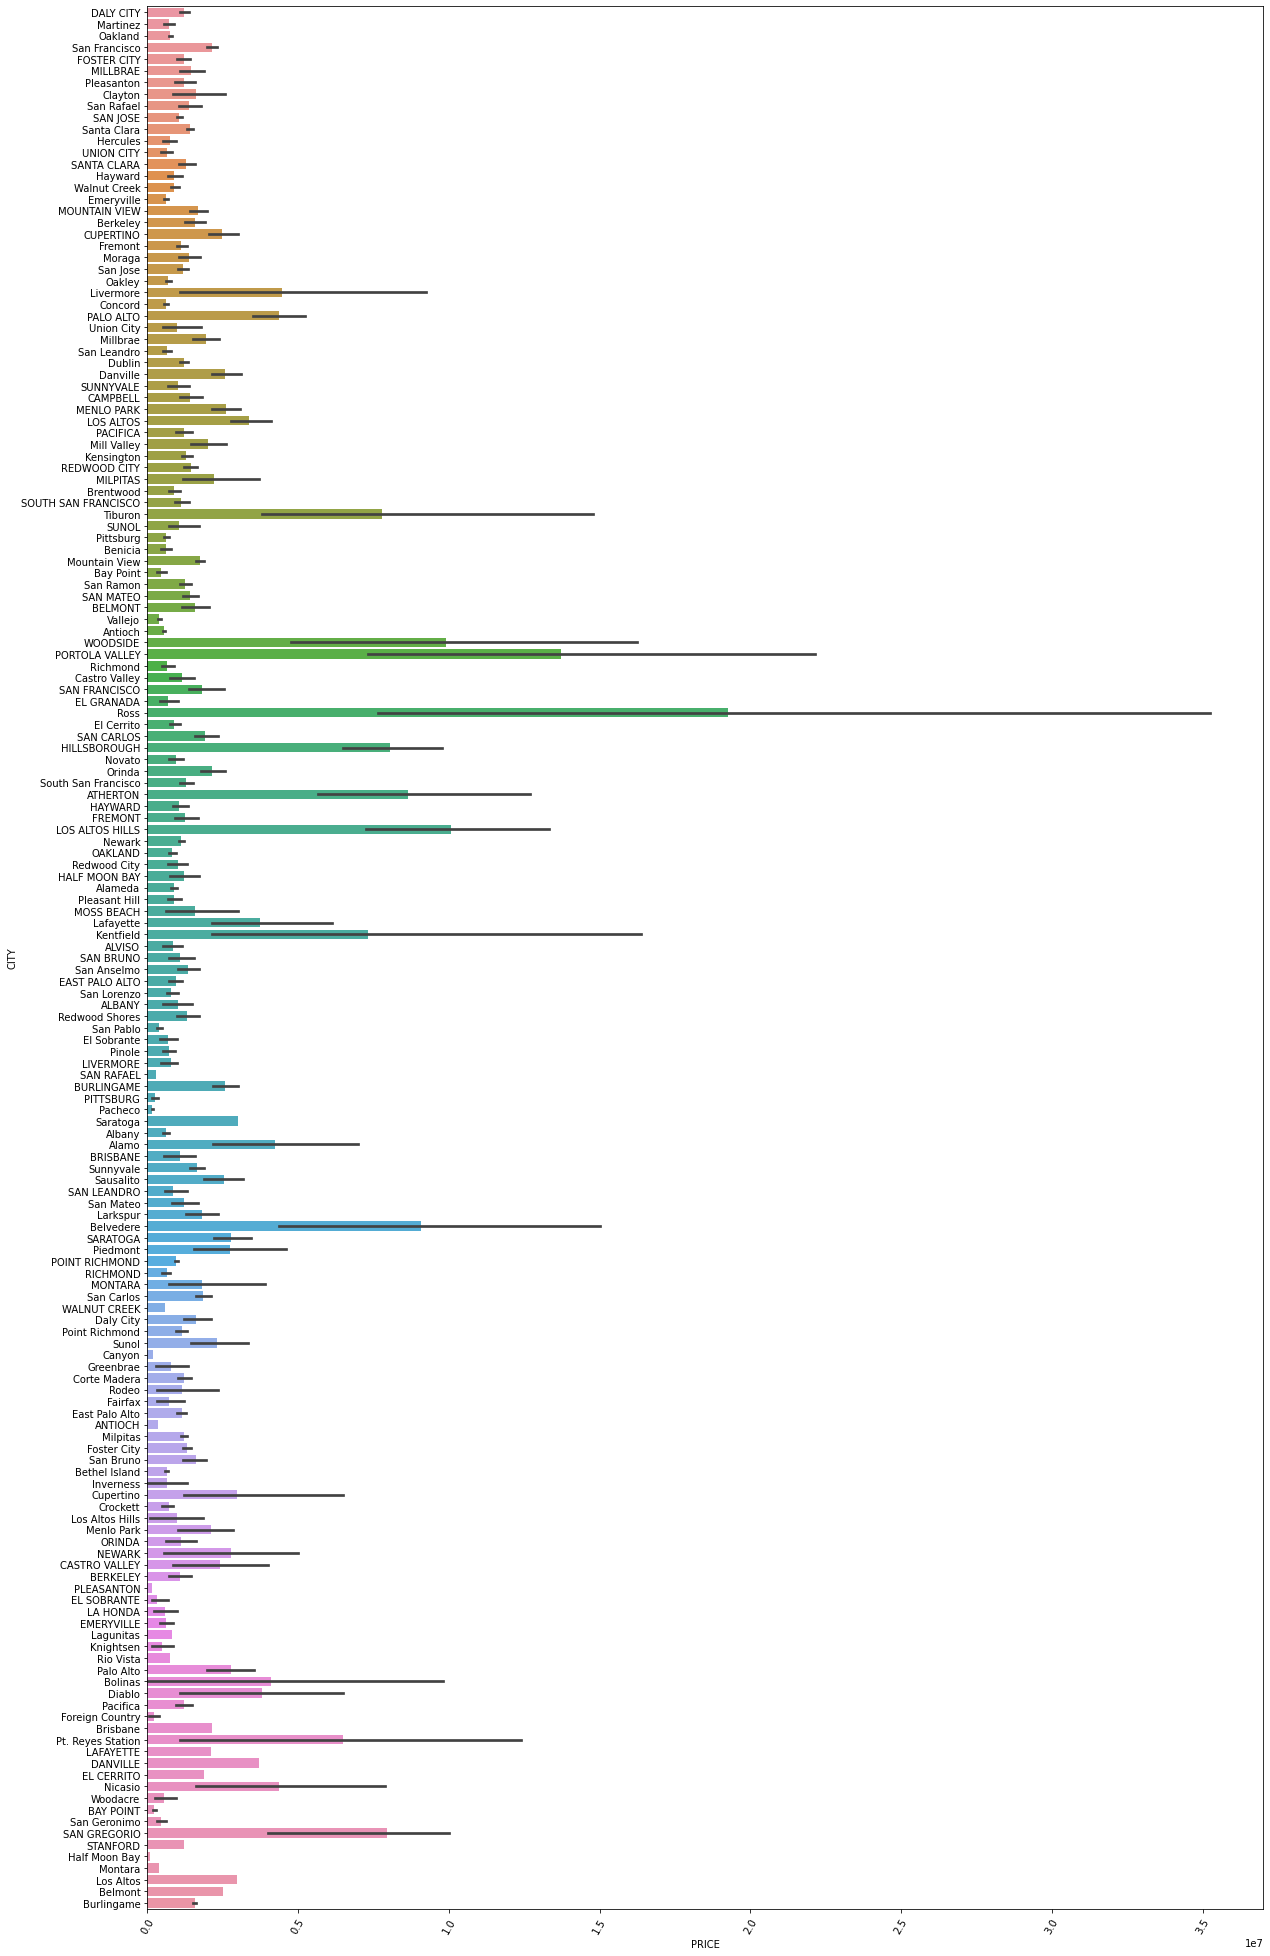

In [13]:
plt.figure(figsize=(20,35))
sns.barplot(x="PRICE", y="CITY", data=df_Redfin)
plt.xticks(rotation=60) 


**Insights:-**

## Step 3: Create a countchart for all the property types (or houses).

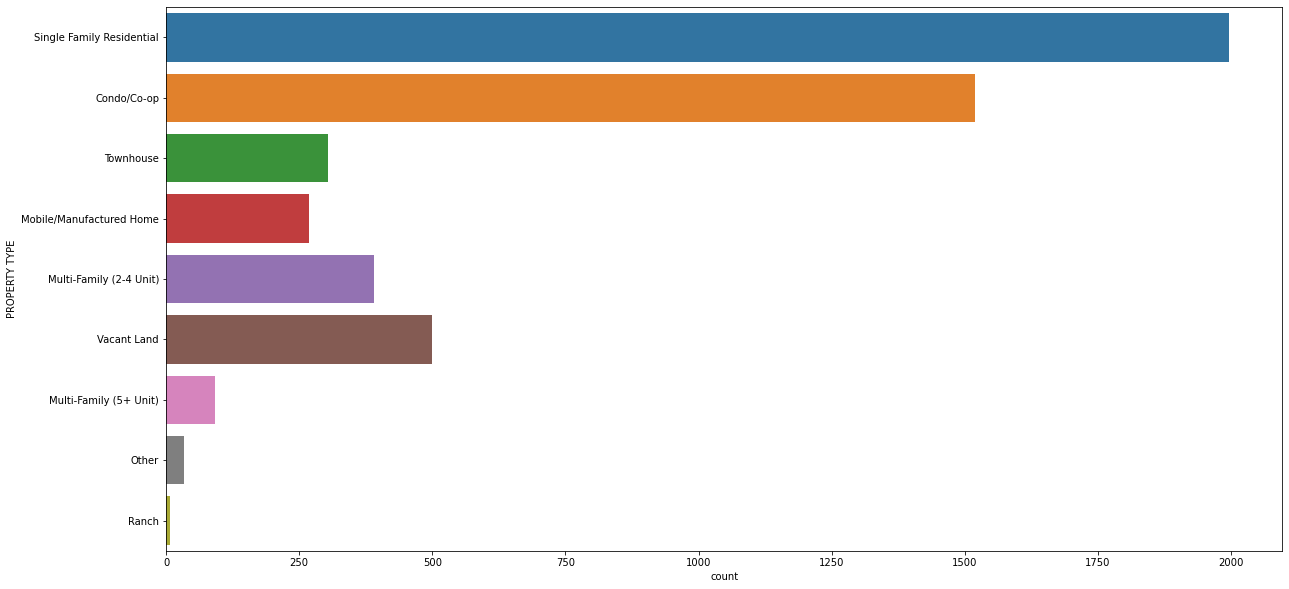

In [14]:
plt.figure(figsize=(20,10))
sns.countplot(y='PROPERTY TYPE', data=df_Redfin)

**Observation:-** Property type having single family has maximum count greater than 1900

## Step 4: Create a barchart for all the property types (or houses).¶

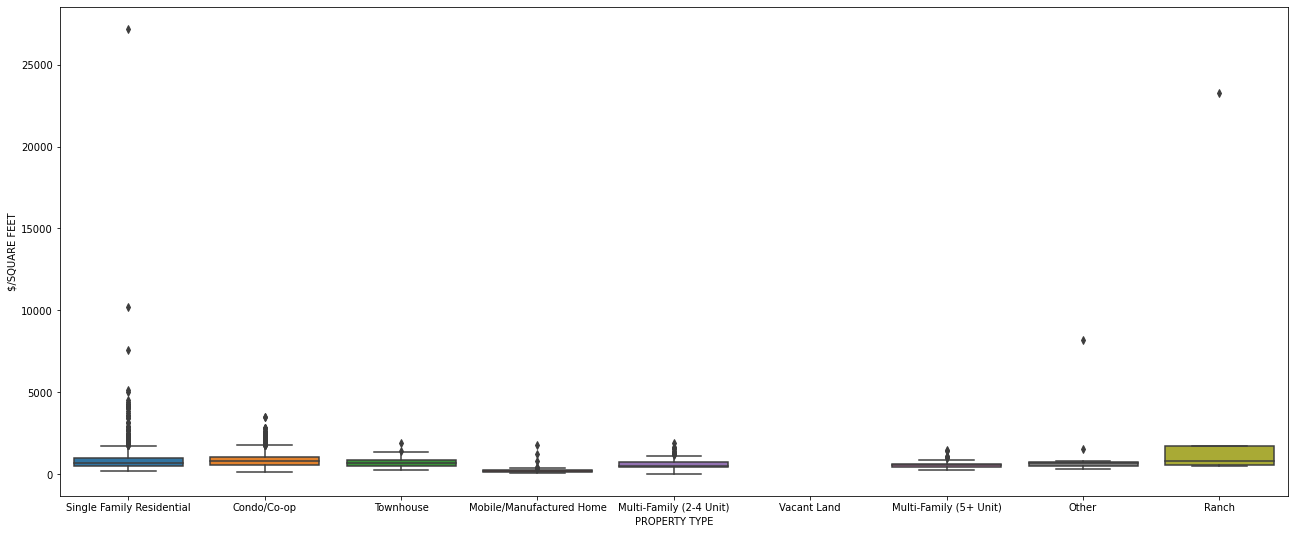

In [15]:
plt.figure(figsize=(22,9))
sns.boxplot(y='$/SQUARE FEET', x='PROPERTY TYPE', data=df_Redfin)

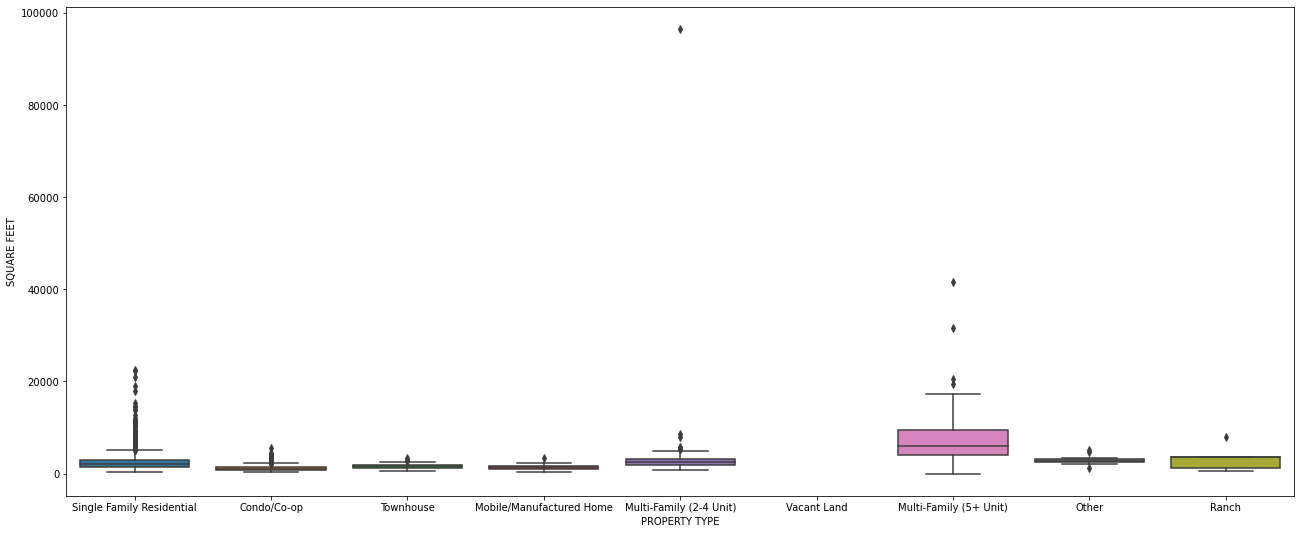

In [16]:
plt.figure(figsize=(22,9))
sns.boxplot(y='SQUARE FEET', x='PROPERTY TYPE', data=df_Redfin)

**Observations:-** 

i)In general, it looks like single family homes and Ranch are more expensive.\
ii)property-type multi family(5+unit) is larger, on average.\
iii)Property-type multi family(2-4 unit) has greater variance in sizes.

## Step 5: Distributions of numeric features
One of the most enlightening data exploration tasks is plotting the distributions of your dataset features.

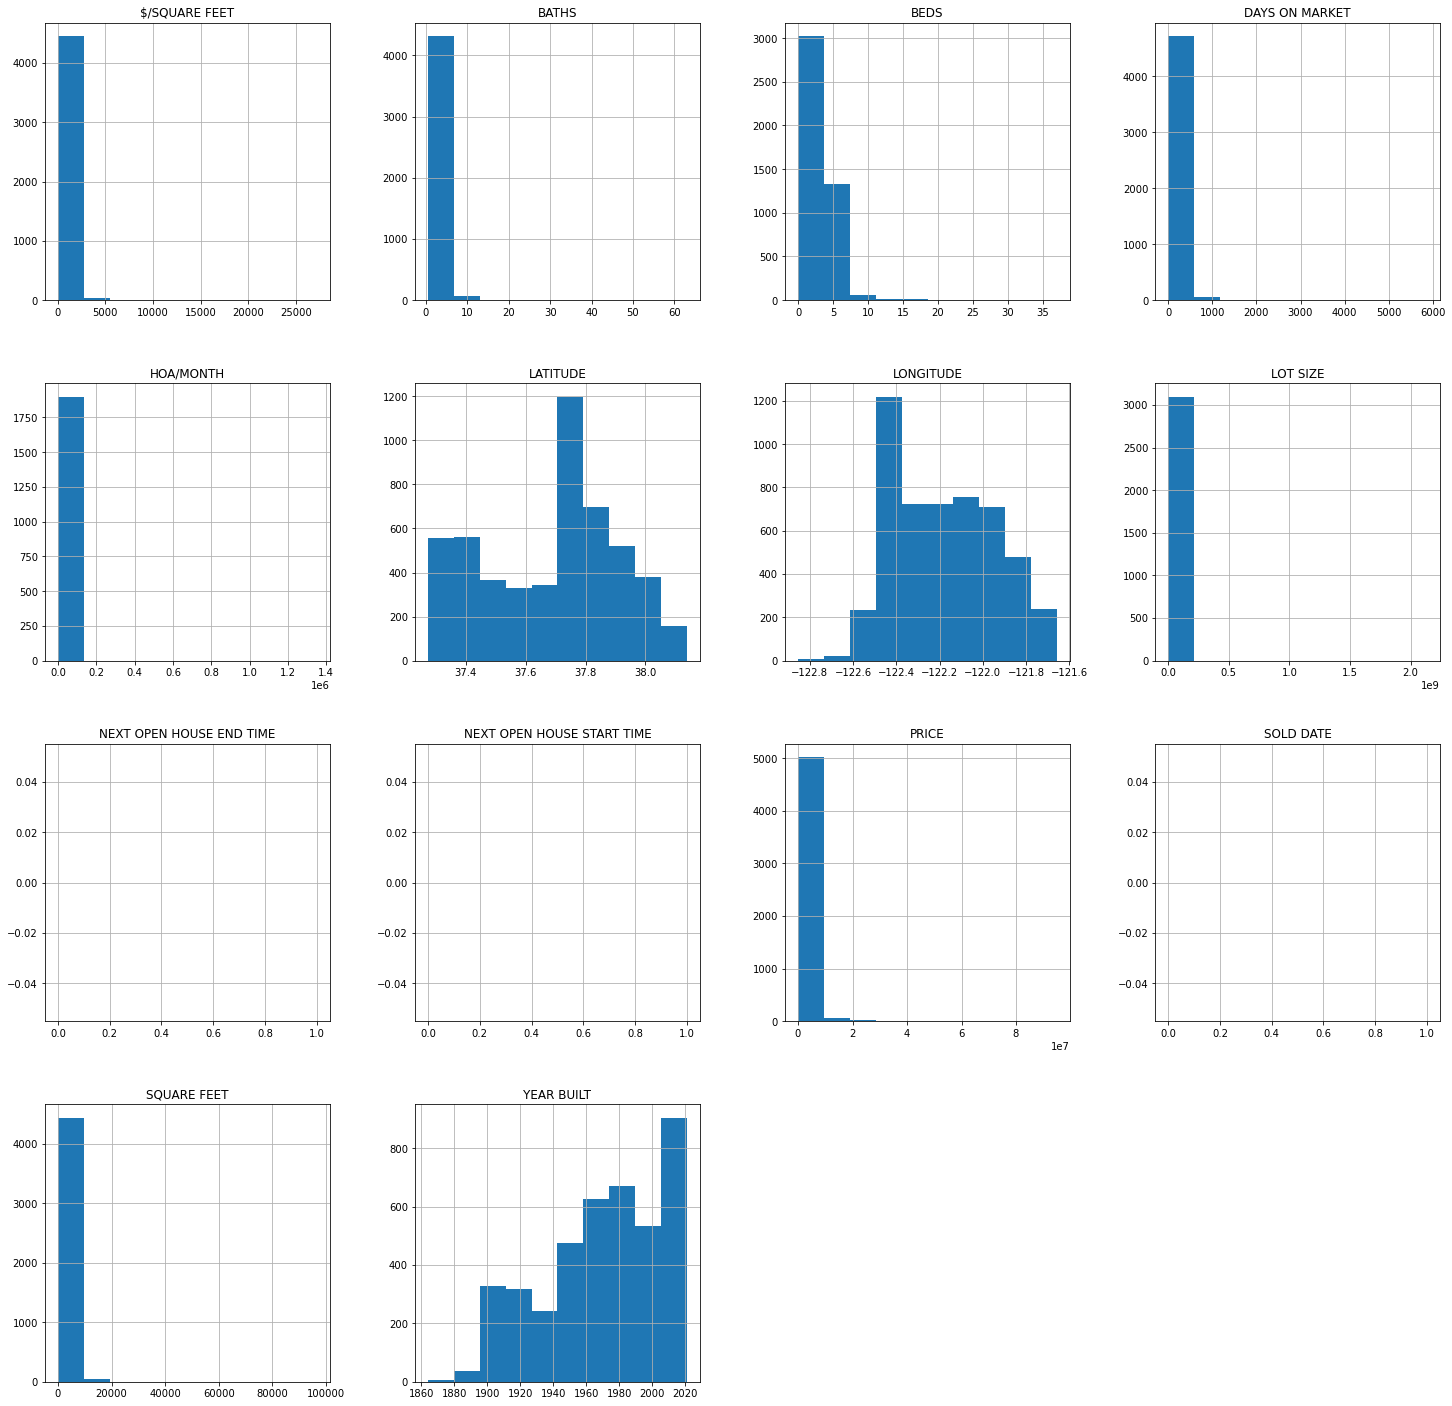

In [17]:
# Plot histogram grid
df_Redfin.hist(figsize=(25,25))
# Clear the text "residue"
plt.show()

**Observations:** We can make out quite a few observations:

For example, consider the **histogram for SQUARE FEET :**

i)More than 4000 houses have area within 20000 sqft\
ii)Might be very few houses have area more than 20000 sqft

Consider the **histogram for BEDROOMS:**

i)Over 3000 houses have less than 5 bedrooms.\
ii)Less than 500 houses have more than 10 bedrooms.\

***Based on the histogram, variables have a lot of outliers.***

*Display summary statistics for the numerical features.*

In [18]:
df_Redfin.describe()

,SOLD DATE,PRICE,BEDS,BATHS,SQUARE FEET,LOT SIZE,YEAR BUILT,DAYS ON MARKET,$/SQUARE FEET,HOA/MONTH,NEXT OPEN HOUSE START TIME,NEXT OPEN HOUSE END TIME,LATITUDE,LONGITUDE
count,0.0,5.112000e+03,4449.000000,4391.000000,4496.000000,3.102000e+03,4145.000000,4791.000000,4489.000000,1.901000e+03,0.0,0.0,5112.000000,5112.000000
mean,NaN,1.692538e+06,3.097325,2.473810,2091.247109,1.228820e+06,1970.944753,88.139219,772.347293,1.362527e+03,NaN,NaN,37.689298,-122.179768
std,NaN,3.346570e+06,2.008573,1.850406,2383.839078,3.955168e+07,36.087505,170.037363,726.006524,3.095725e+04,NaN,NaN,0.223479,0.230666
min,NaN,1.500000e+04,0.000000,0.500000,3.000000,1.000000e+00,1864.000000,1.000000,24.000000,0.000000e+00,NaN,NaN,37.274427,-122.854787
25%,NaN,5.990000e+05,2.000000,2.000000,1109.750000,3.192250e+03,1948.000000,8.000000,469.000000,3.440000e+02,NaN,NaN,37.489074,-122.395125
50%,NaN,9.850000e+05,3.000000,2.000000,1581.000000,6.102000e+03,1974.000000,51.000000,671.000000,4.850000e+02,NaN,NaN,37.754498,-122.202806
75%,NaN,1.682660e+06,4.000000,3.000000,2368.500000,1.336650e+04,2003.000000,105.000000,941.000000,6.790000e+02,NaN,NaN,37.845171,-121.995271
max,NaN,9.500000e+07,37.000000,63.000000,96530.000000,2.134440e+09,2021.000000,5867.000000,27200.000000,1.350000e+06,NaN,NaN,38.138003,-121.656868


## Step 6: Identify Outliers

In [19]:
Q1=df_Redfin.quantile(0.25)
Q3=df_Redfin.quantile(0.75)
IQR = Q3-Q1

index=df_Redfin.index
total_entry=len(index)
print(str(total_entry))


no_outliers = ~((df_Redfin < Q1 - 1.5 * IQR) | (df_Redfin > Q3 + 1.5 *IQR)).any(axis=1)
df_Redfin1= df_Redfin[no_outliers]  
index1=df_Redfin1.index
num_of_entry=len(index1)
print(num_of_entry)

print ("When we have not removed any outliers from the dataset, we have " + str(total_entry) + " entries") 
print ("When we have removed any outliers from the dataset, we have " + str(num_of_entry) + " entries")

Proportion_Outliers= round ((len(df_Redfin)- len(df_Redfin1))/ (len(df_Redfin)),2) 
print("Proportion Outliers =" +' '+str(Proportion_Outliers))


5113
3926
When we have not removed any outliers from the dataset, we have 5113 entries
When we have removed any outliers from the dataset, we have 3926 entries
Proportion Outliers = 0.23


C:\Users\16508\anaconda3\envs\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\16508\anaconda3\envs\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


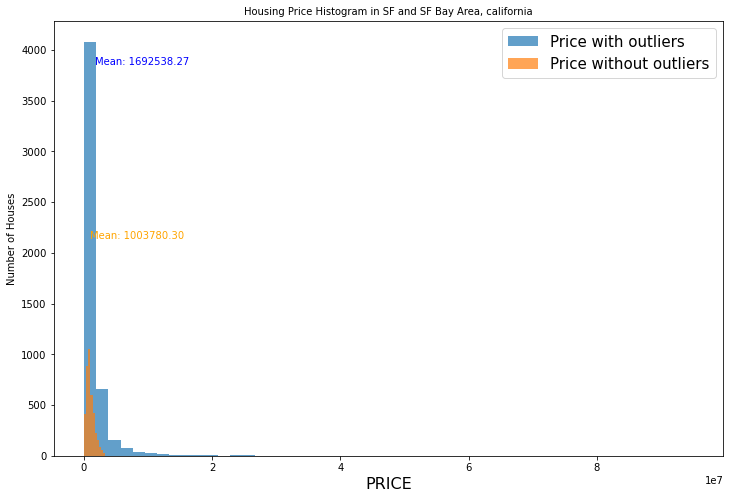

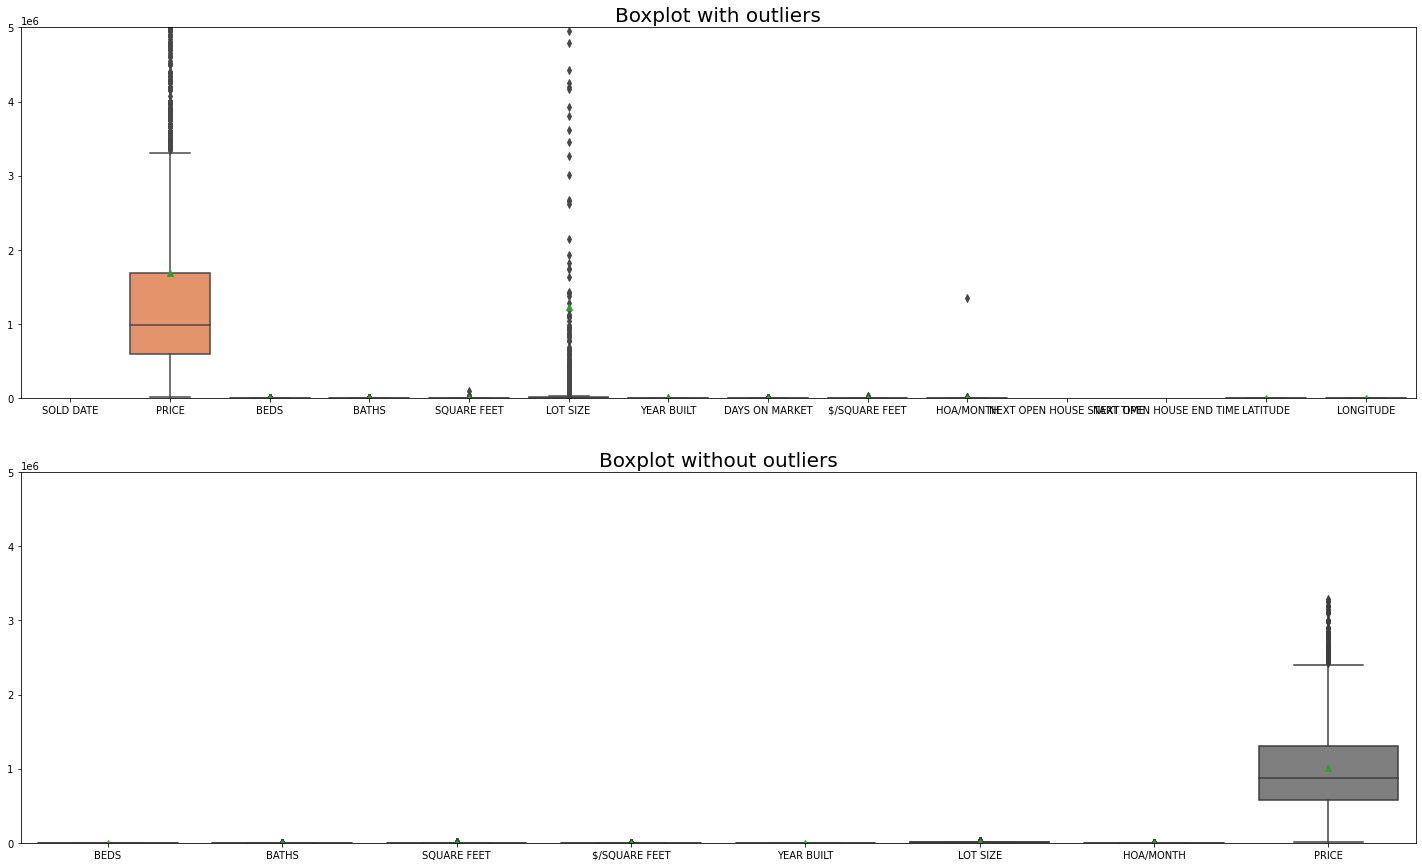

In [20]:
# Create a histogram of Price without Outliers



plt.figure(figsize=(12,8))

_ = plt.hist(df_Redfin['PRICE'], bins=50, alpha=0.7, label = 'Price with outliers',)
_ = plt.hist(df_Redfin1['PRICE'], bins=10, alpha=0.7, label = 'Price without outliers')

_ = plt.xlabel('PRICE', fontsize=16)

_ = plt.ylabel('Number of Houses',fontsize=10)

min_ylim, max_ylim = plt.ylim()
plt.text(df_Redfin['PRICE'].mean(), max_ylim*0.9, 'Mean: {:.2f}'.format(df_Redfin['PRICE'].mean()), color='blue')
plt.text(df_Redfin1['PRICE'].mean(), max_ylim*0.5, 'Mean: {:.2f}'.format(df_Redfin1['PRICE'].mean()), color='orange')

_= plt.legend(loc='upper right', prop={'size':15})



_= plt.title('Housing Price Histogram in SF and SF Bay Area, california', fontsize=10)
plt.show()

;
# Generate boxplot without outliers by all variables except for ID and Data since they are not significant.


filt2 = ['BEDS','BATHS', 'SQUARE FEET', 'CITY', '$/SQUARE FEET', 'YEAR BUILT', 
         'PROPERTY TYPE', 'LOT SIZE','HOA/MONTH','PRICE']

df_Redfin2=df_Redfin1[filt2]



f, ax = plt.subplots(figsize=(25, 15))
plt.subplot(2,1,1)
fig = sns.boxplot(data=df_Redfin, showmeans=True)
fig.axis(ymin=0, ymax=5000000)
plt.title('Boxplot with outliers',fontsize=20)

;
plt.subplot(2,1,2)
fig2 = sns.boxplot(data=df_Redfin2, showmeans=True)
fig2.axis(ymin=0, ymax=5000000)
plt.title('Boxplot without outliers',fontsize=20)
;
plt.show()

**Observation: There are 3926 entries for the outliers comparing to the 5113 total dataset entries. If we remove the outliners with higher percentage of the dataset, the mean of Price will be lower and the shape of the graph will change a lot.It is good to not remove outliners for this dataset to visualize the data and predict the price.**

**Insight**

Since the percentage of outliers are high. it may be not a good idead to create a regression model without outliners

## Step 7: Plot the relationship between Price and variables in one chart.

[]

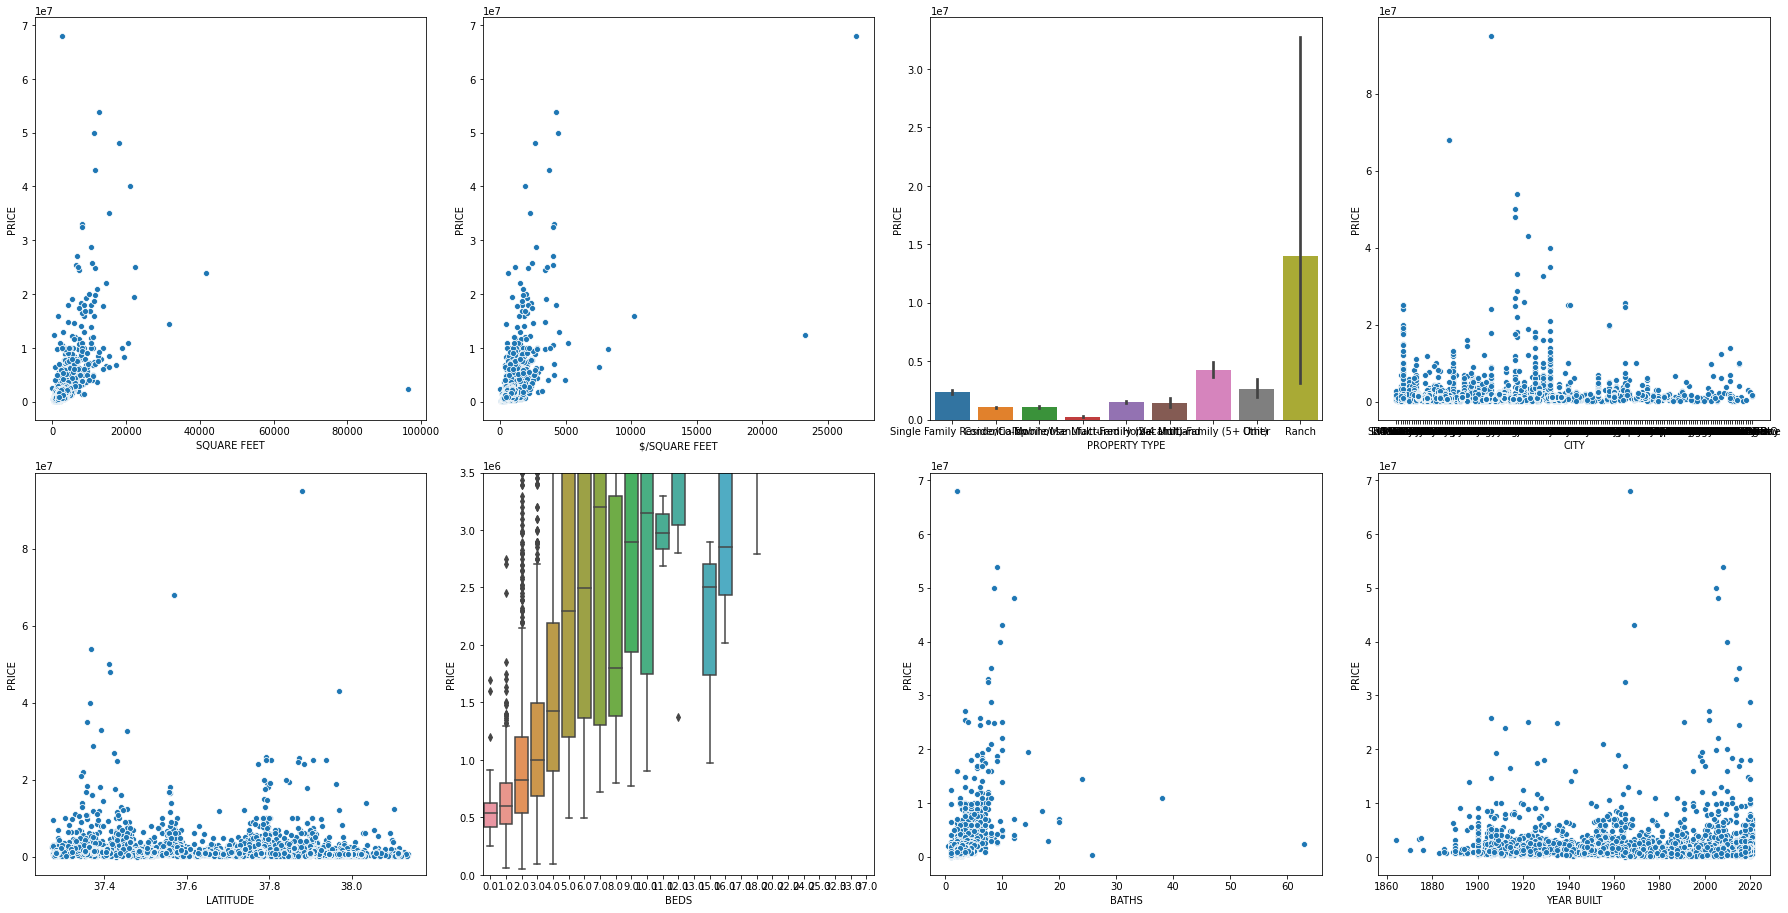

In [21]:
plt.figure(figsize=(25,25))
plt.subplot(4,4,1)
sns.scatterplot(y='PRICE',x='SQUARE FEET',data=df_Redfin)

plt.subplot(4,4,2)
sns.scatterplot(y='PRICE',x='$/SQUARE FEET',data=df_Redfin)

plt.subplot(4,4,3)
sns.barplot(y='PRICE',x='PROPERTY TYPE',data=df_Redfin)

plt.subplot(4,4,4)
sns.scatterplot(y='PRICE',x='CITY',data=df_Redfin)


plt.subplot(4,4,5)
sns.scatterplot(y='PRICE',x='LATITUDE',data=df_Redfin)

plt.subplot(4,4,6)
fig = sns.boxplot(x='BEDS', y="PRICE", data=df_Redfin)
fig.axis(ymin=0, ymax=3500000)

plt.subplot(4,4,7)
sns.scatterplot(y='PRICE',x='BATHS',data=df_Redfin)


plt.subplot(4,4,8)
sns.scatterplot(y='PRICE', x='YEAR BUILT',data=df_Redfin)

plt.tight_layout()
plt.plot()


**Observations:-**

i)Price is high for newly built houses.\
ii)Looks like the price is positive related to square feet of the house.\
iii)Price is high for ranch and multi-family(5+unit)


## Part 2: <span style="color:green">INFERENTIAL STATISTICAL ANALYSIS</span> ##

**Correlations**

Finally, let's take a look at the relationships between numeric features and other numeric features.
Correlation is a value between -1 and 1 that represents how closely values for two separate features move in unison.\

Positive correlation means that as one feature increases, the other increases; eg. a child's age and her height.\
Negative correlation means that as one feature increases, the other decreases; eg. hours spent studying and number of parties attended.

Correlations near -1 or 1 indicate a strong relationship.\
Those closer to 0 indicate a weak relationship.\
0 indicates no relationship.

In [22]:
df_Redfin.corr()

,SOLD DATE,PRICE,BEDS,BATHS,SQUARE FEET,LOT SIZE,YEAR BUILT,DAYS ON MARKET,$/SQUARE FEET,HOA/MONTH,NEXT OPEN HOUSE START TIME,NEXT OPEN HOUSE END TIME,LATITUDE,LONGITUDE
SOLD DATE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PRICE,NaN,1.000000,0.314921,0.412532,0.537562,0.293594,-0.007379,0.141850,0.578629,0.009857,NaN,NaN,-0.082461,-0.098012
BEDS,NaN,0.314921,1.000000,0.730102,0.674892,-0.005108,-0.163308,0.087735,-0.036544,-0.108392,NaN,NaN,0.012556,0.025028
BATHS,NaN,0.412532,0.730102,1.000000,0.716533,-0.010239,0.057853,0.094428,0.039652,-0.007534,NaN,NaN,-0.068537,0.052916
SQUARE FEET,NaN,0.537562,0.674892,0.716533,1.000000,-0.014280,-0.036479,0.130876,0.046969,0.007443,NaN,NaN,0.001780,-0.045346
LOT SIZE,NaN,0.293594,-0.005108,-0.010239,-0.014280,1.000000,-0.009866,0.045244,0.074310,0.003465,NaN,NaN,-0.008283,0.033525
YEAR BUILT,NaN,-0.007379,-0.163308,0.057853,-0.036479,-0.009866,1.000000,-0.013189,-0.018234,0.004603,NaN,NaN,-0.146340,0.257777
DAYS ON MARKET,NaN,0.141850,0.087735,0.094428,0.130876,0.045244,-0.013189,1.000000,0.191947,0.038182,NaN,NaN,0.028985,-0.055402
$/SQUARE FEET,NaN,0.578629,-0.036544,0.039652,0.046969,0.074310,-0.018234,0.191947,1.000000,0.353697,NaN,NaN,-0.109730,-0.215386
HOA/MONTH,NaN,0.009857,-0.108392,-0.007534,0.007443,0.003465,0.004603,0.038182,0.353697,1.000000,NaN,NaN,0.043677,-0.056655


**A lot of numbers make things difficult to read. So let's visualize this.**

But first, it's important to notice that the correlations for 'SOLD DATE','NEXT OPEN HOUSE START TIME' and 'NEXT OPEN HOUSE END TIME' all show as NaN. This is expected because right now that variables don't vary at all (its standard deviation is NaN) and these variables do not have any values, as we saw all the way back in VERY begning.

## Step 8: Create Heatmap

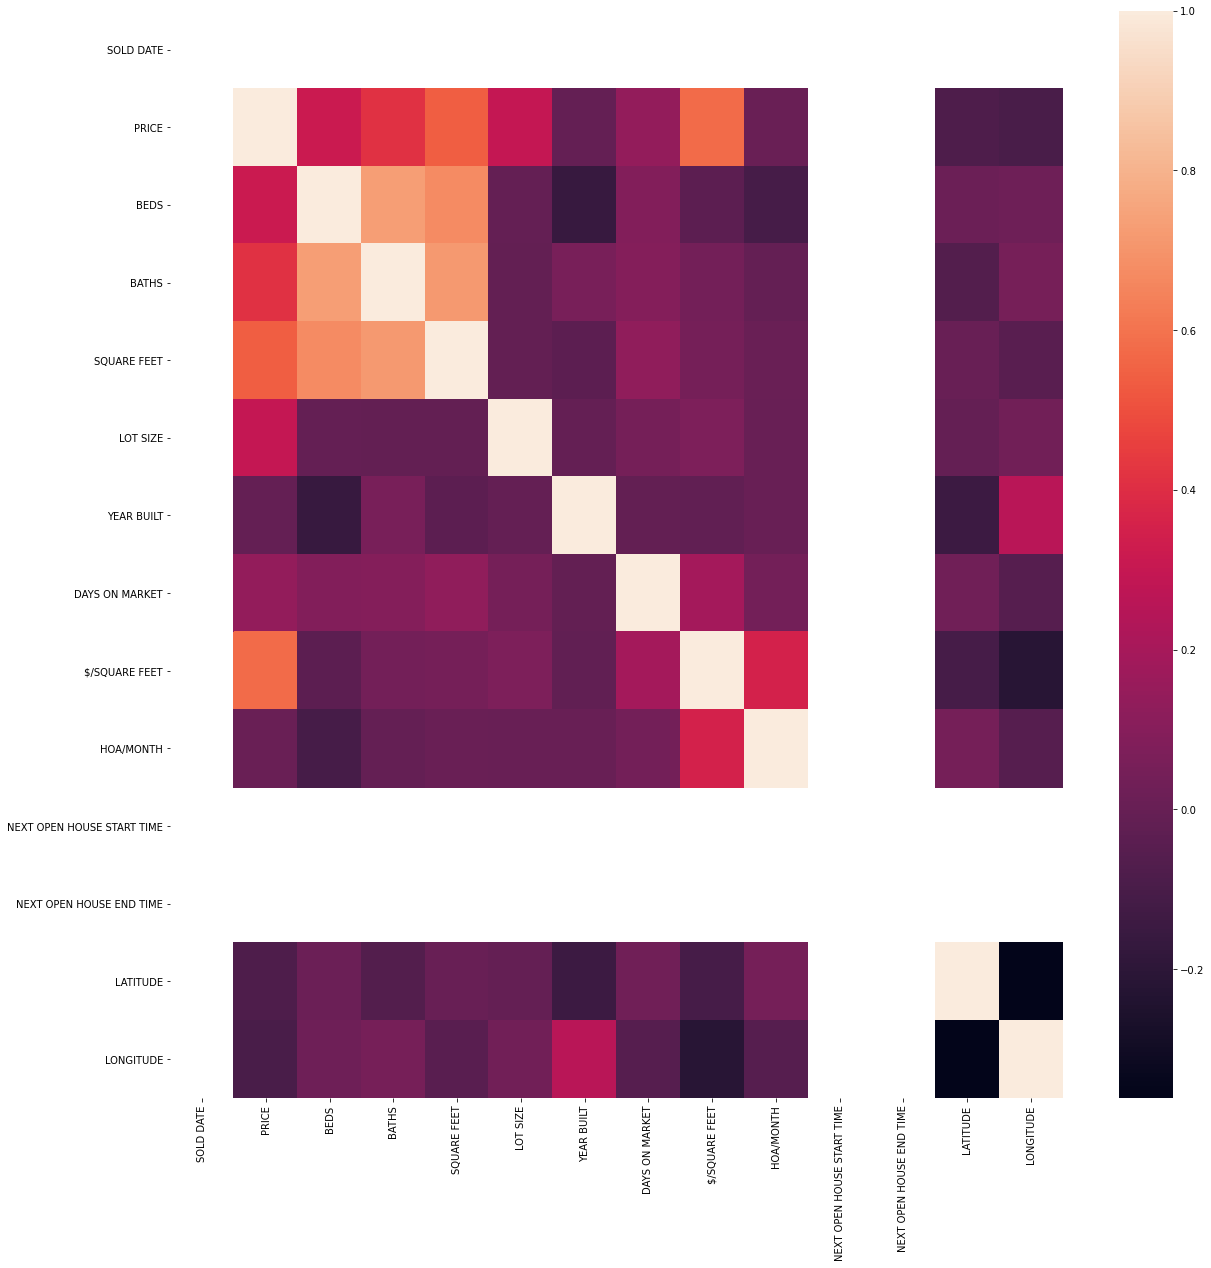

In [23]:
plt.figure(figsize=(20,20))
sns.heatmap(df_Redfin.corr())

**What to look for?**

The colorbar on the right explains the meaning of the heatmap - Dark colors indicate **strong negative correlations** and light colors indicate **strong positive correlations.**

Perhaps the most helpful way to interpret this correlation heatmap is to first find features that are correlated with our target variable by scanning the first column.

In this case, it looks like many features are strongly correlated with the target variable.

Example: there is a strong negative correlation between beds and year built.

There is a weak positive correlation between 'beds' and 'square feet'.

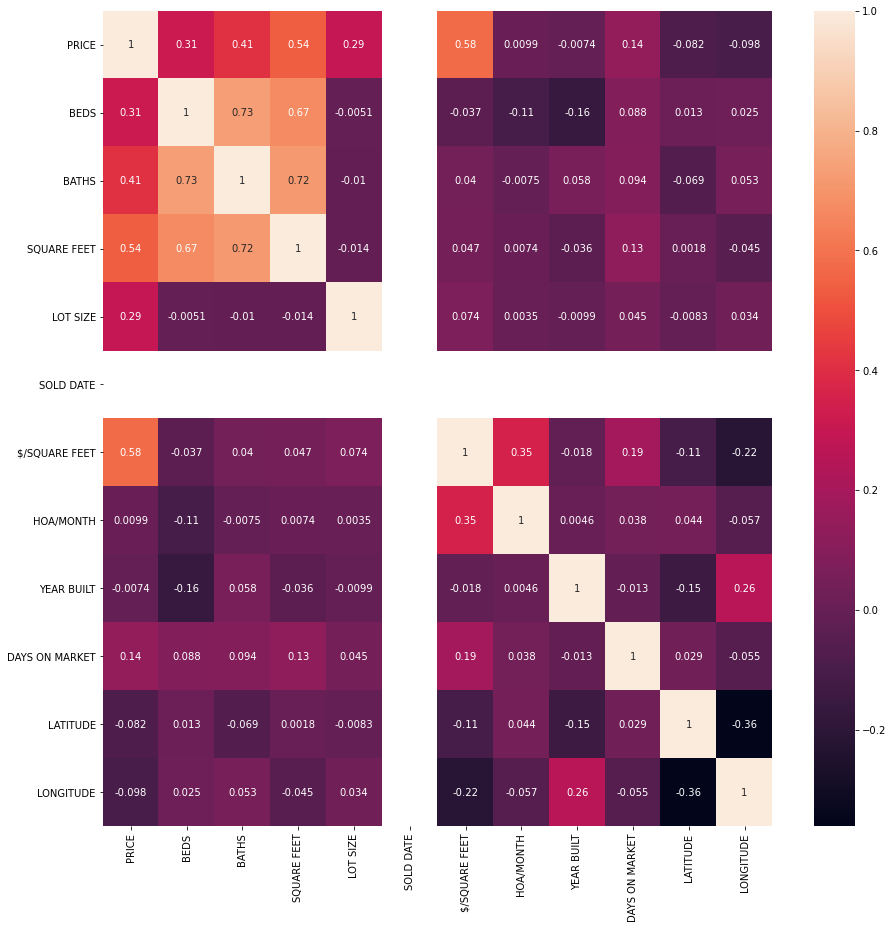

In [24]:
filtc = ['PRICE','BEDS', 'BATHS', 'SQUARE FEET','LOT SIZE','PROPERTY TYPE','SOLD DATE','$/SQUARE FEET','HOA/MONTH', 
         'YEAR BUILT', 'DAYS ON MARKET', 'CITY', 'LATITUDE', 'LONGITUDE']

df_Redfin = df_Redfin[filtc]
mpl.rcParams['figure.figsize'] = (15,15)

Var_Corr = df_Redfin.corr()

sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, annot=True)

plt.show()


**Observation:**

The variables which have high correlation with price includes Baths, Beds, $/Square feet, Square feet.

## Step 9: Create a Barplot of top Correlated Features


[]

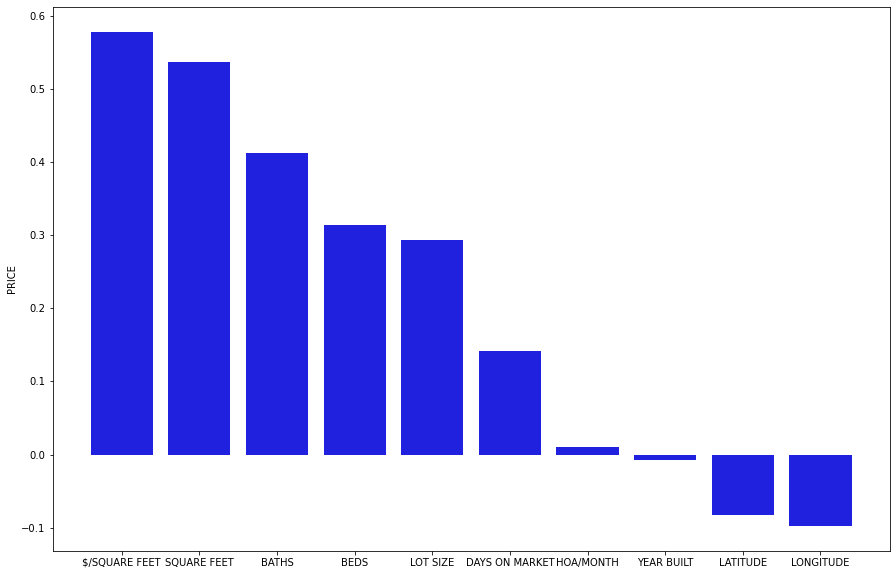

In [25]:
df_Redfinn = Var_Corr.loc[:,['PRICE']]
df_Redfinn = df_Redfinn.sort_values(by='PRICE', ascending=False).drop('PRICE')

plt.figure(figsize=(15,10))

sns.barplot(data=df_Redfinn, x = df_Redfinn.index, y = 'PRICE', color='blue')

plt.plot()

**Observation:** 

Top 6 variables which have highest correlation with price by order are **$/SQUARE FEET, SQUARE FEET, BATHS, BEDS, LOT SIZE, and DAYS ON MARKET**.Those 6 variable contribute most to the house price. Other variables do not have high correlations with Price, which do not have significant impacts on selling price.

Based on the heatmap and Barplot of Correlated Features, the variables **$/SQUARE FEET, SQUARE FEET, BATHS, BEDS, LOT SIZE, and DAYS ON MARKET** are the main variable that need to add to the regression model.

## Step 10: Use OLS Regression 


#### MODEL 1 :- Use OLS Regression including all the variables with outliers! ####

In [40]:
#We will not include text variables in our regression model as it will show error!
import statsmodels.api as sm

M1 =['BEDS', 'BATHS', 'SQUARE FEET', 'LOT SIZE',
       'SOLD DATE', '$/SQUARE FEET','HOA/MONTH', 'YEAR BUILT',
       'DAYS ON MARKET', 'LATITUDE', 'LONGITUDE']

M1_Redfin=['PRICE']
X = df_Redfin[M1]
y = df_Redfin[M1_Redfin]

X = sm.add_constant(X) 

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.473
Model:                            OLS   Adj. R-squared:                  0.472
Method:                 Least Squares   F-statistic:                     457.7
Date:                Thu, 11 Feb 2021   Prob (F-statistic):               0.00
Time:                        12:51:08   Log-Likelihood:                -82432.
No. Observations:                5113   AIC:                         1.649e+05
Df Residuals:                    5102   BIC:                         1.650e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -1.521e+06   2.41e+06     -0.631      0.528   -6.25e+06    3.21e+06
BEDS           -1.295e+04   2.15e+04     -0.603      0.546    -5.5e+04    2.91e+04
BATHS           2.377e+05   2.29e+04     10.386      0.000    1.93e+05    2.83e+05
SQUARE FEET      494.3551     17.637     28.029      0.000     459.778     528.932
LOT SIZE           0.0291      0.001     26.330      0.000       0.027       0.031
SOLD DATE      -3.132e-08   4.83e-08     -0.649      0.516   -1.26e-07    6.33e-08
$/SQUARE FEET   1942.7212     50.090     38.784      0.000    1844.522    2040.920
HOA/MONTH          0.7439      1.802      0.413      0.680      -2.789       4.277
YEAR BUILT      -646.0905     48.574    -13.301      0.000    -741.316    -550.865
DAYS ON MARKET  2605.2738    209.454     12.438      0.000    2194.655    3015.893
LATITUDE       -5.792e+05   1.68e+05     -3.450      0.001   -9.08e+05    -2.5e+05
LONGITUDE      -1.894e+05   5.57e+04     -3.398      0.001   -2.99e+05   -8.01e+04
==============================================================================
Omnibus:                     9480.924   Durbin-Watson:                   1.915
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         51589890.924
Skew:                          13.224   Prob(JB):                         0.00
Kurtosis:                     494.385   Cond. No.                     1.64e+21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.81e-24. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [38]:
X

,const,BEDS,BATHS,SQUARE FEET,LOT SIZE,PROPERTY TYPE,SOLD DATE,$/SQUARE FEET
0,1.0,3.0,2.5,2265.0,1770.0,Single Family Residential,0.0,573.0
1,1.0,3.0,2.5,1816.0,3200.0,Single Family Residential,0.0,434.0
2,1.0,2.0,2.0,1247.0,0.0,Condo/Co-op,0.0,581.0
3,1.0,3.0,2.0,912.0,3120.0,Single Family Residential,0.0,657.0
4,1.0,2.0,2.0,989.0,0.0,Condo/Co-op,0.0,1312.0
...,...,...,...,...,...,...,...,...
5108,1.0,3.0,2.5,1880.0,0.0,Townhouse,0.0,864.0
5109,1.0,5.0,4.0,2828.0,0.0,Single Family Residential,0.0,410.0
5110,1.0,3.0,2.0,1433.0,0.0,Single Family Residential,0.0,613.0
5111,1.0,3.0,3.5,1888.0,0.0,Multi-Family (2-4 Unit),0.0,447.0


In [27]:
df_Redfin.columns

Index(['PRICE', 'BEDS', 'BATHS', 'SQUARE FEET', 'LOT SIZE', 'PROPERTY TYPE',
       'SOLD DATE', '$/SQUARE FEET', 'HOA/MONTH', 'YEAR BUILT',
       'DAYS ON MARKET', 'CITY', 'LATITUDE', 'LONGITUDE'],
      dtype='object')

In [35]:
#df_Redfin= df_Redfin.dropna(axis=0,inplace=True)
df_Redfin = pd.read_csv(r'C:\Users\16508\Downloads\redfin_2021-01-13-12-39-56.csv') 
df_Redfin = df_Redfin.fillna(0)

In [ ]:
#df_Redfin.to_csv("out_redfin")

### Model 2: Use OLS Regression including only 6 variables with outliers. (Use lesss variable, forcus on the variables have high correlations.)

In [48]:
## We will not include text variables in our regression model as it will show error!
import statsmodels.api as sm

M2 =['BEDS', 'BATHS', 'SQUARE FEET', 'LOT SIZE',
        '$/SQUARE FEET','DAYS ON MARKET']

M2_Redfin=['PRICE']
X1 = df_Redfin[M2]
y1 = df_Redfin[M2_Redfin]

X1 = sm.add_constant(X1) 

# Note the difference in argument order
model = sm.OLS(y1, X1).fit()
predictions = model.predict(X1) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.454
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     708.0
Date:                Thu, 11 Feb 2021   Prob (F-statistic):               0.00
Time:                        13:06:58   Log-Likelihood:                -82521.
No. Observations:                5113   AIC:                         1.651e+05
Df Residuals:                    5106   BIC:                         1.651e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -1.027e+06    6.7e+04    -15.341      0.000   -1.16e+06   -8.96e+05
BEDS           -6.353e+04   2.15e+04     -2.958      0.003   -1.06e+05   -2.14e+04
BATHS            2.35e+05   2.32e+04     10.110      0.000    1.89e+05    2.81e+05
SQUARE FEET      487.4404     17.930     27.186      0.000     452.290     522.591
LOT SIZE           0.0294      0.001     26.174      0.000       0.027       0.032
$/SQUARE FEET   1801.3268     48.474     37.161      0.000    1706.298    1896.356
DAYS ON MARKET  3050.2507    210.297     14.504      0.000    2637.978    3462.524
==============================================================================
Omnibus:                     9431.658   Durbin-Watson:                   1.938
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         46383507.629
Skew:                          13.109   Prob(JB):                         0.00
Kurtosis:                     468.868   Cond. No.                     6.03e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.03e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Model 3: Use OLS Regression including all the variables without outliers.

In [43]:
import statsmodels.api as sm

M3 =['BEDS', 'BATHS', 'SQUARE FEET', 'LOT SIZE',
       'SOLD DATE', '$/SQUARE FEET', 'HOA/MONTH', 'YEAR BUILT',
       'DAYS ON MARKET' ,'LATITUDE', 'LONGITUDE']

M3_Redfin=['PRICE']
X2 = df_Redfin[M3]
y2 = df_Redfin[M3_Redfin]

X2 = sm.add_constant(X2) 

# Note the difference in argument order
model = sm.OLS(y2, X2).fit()
predictions = model.predict(X2) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.473
Model:                            OLS   Adj. R-squared:                  0.472
Method:                 Least Squares   F-statistic:                     457.7
Date:                Thu, 11 Feb 2021   Prob (F-statistic):               0.00
Time:                        13:04:26   Log-Likelihood:                -82432.
No. Observations:                5113   AIC:                         1.649e+05
Df Residuals:                    5102   BIC:                         1.650e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -1.521e+06   2.41e+06     -0.631      0.528   -6.25e+06    3.21e+06
BEDS           -1.295e+04   2.15e+04     -0.603      0.546    -5.5e+04    2.91e+04
BATHS           2.377e+05   2.29e+04     10.386      0.000    1.93e+05    2.83e+05
SQUARE FEET      494.3551     17.637     28.029      0.000     459.778     528.932
LOT SIZE           0.0291      0.001     26.330      0.000       0.027       0.031
SOLD DATE      -3.132e-08   4.83e-08     -0.649      0.516   -1.26e-07    6.33e-08
$/SQUARE FEET   1942.7212     50.090     38.784      0.000    1844.522    2040.920
HOA/MONTH          0.7439      1.802      0.413      0.680      -2.789       4.277
YEAR BUILT      -646.0905     48.574    -13.301      0.000    -741.316    -550.865
DAYS ON MARKET  2605.2738    209.454     12.438      0.000    2194.655    3015.893
LATITUDE       -5.792e+05   1.68e+05     -3.450      0.001   -9.08e+05    -2.5e+05
LONGITUDE      -1.894e+05   5.57e+04     -3.398      0.001   -2.99e+05   -8.01e+04
==============================================================================
Omnibus:                     9480.924   Durbin-Watson:                   1.915
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         51589890.924
Skew:                          13.224   Prob(JB):                         0.00
Kurtosis:                     494.385   Cond. No.                     1.64e+21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.81e-24. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

#### Observation:  I choose model 1 since it has highest R square.

### Insights: Based on the regression model 1, we believe the predicted price is 47.3% accurate. We can use the prediction to help client find out better investment opportunity.

## Step 11: Validate Predictions 

      Prediction  Test Data
0   1.508733e+06  1298000.0
1   1.039530e+06   789000.0
2   9.820612e+05   725000.0
3   8.952771e+05   599000.0
4   2.176122e+06  1298000.0
5   1.856130e+06   858000.0
6   1.338049e+06   680000.0
7   2.117970e+06  1998000.0
8   1.065265e+06   648000.0
9   1.130862e+06   840000.0
10  1.060164e+06   779000.0
11  1.626898e+06   899000.0
12  1.047167e+06   619000.0
13  1.439408e+06  1198888.0
14  1.632383e+06  1348888.0
15  1.563233e+06  1045000.0
16  8.901407e+05   720000.0
17  9.485801e+05   599888.0
18  8.424601e+05   649000.0
19  1.800949e+06  1198000.0


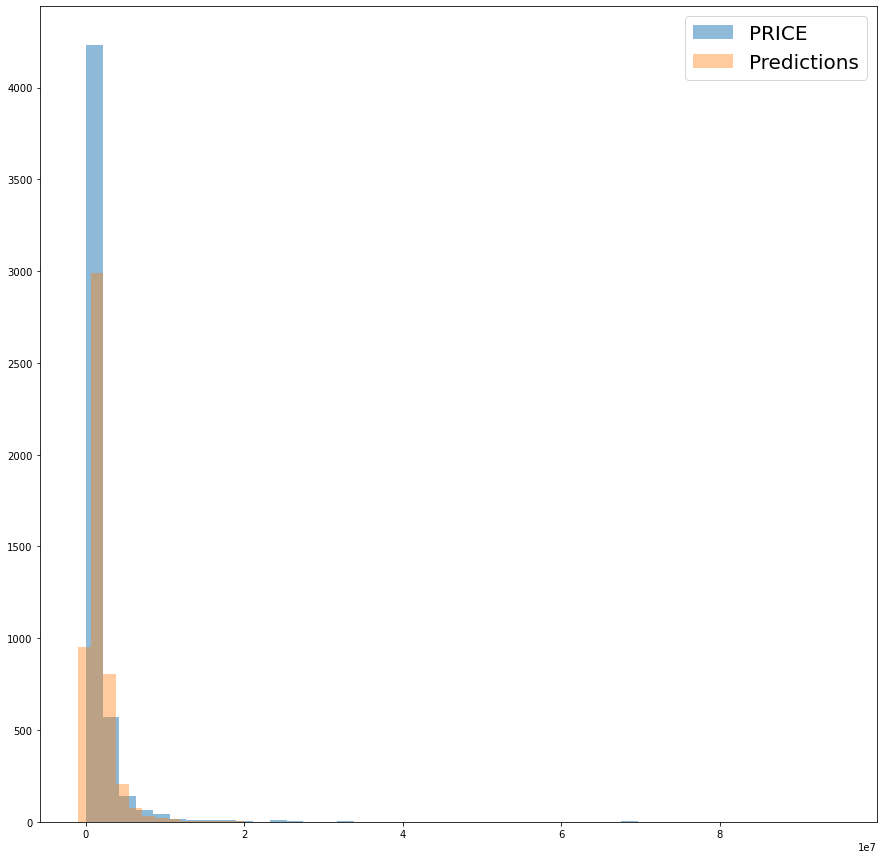

In [49]:
# Validate Predictions



plt.rcParams['figure.figsize'] = (15,15)


predict =predictions.reset_index()[0]
y_result = y.reset_index()['PRICE']


compare = pd.DataFrame({'Prediction': predictions, 'Test Data' : df_Redfin['PRICE']})
print(compare.head(20))


plt.hist(df_Redfin['PRICE'], bins=45,alpha=0.5, label = 'PRICE')

plt.hist(predictions, bins=40,alpha=0.4, label = 'Predictions')

plt.legend(loc='upper right', prop={'size':20})

plt.show()


### <font color='red'>Insights: 
The regression model maybe not good to be used to predict the price for the house which price is betweem 4M to 8M. </font>

# END